## Simulating Sampling Error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

For the first scenario, our simulation takes a simple random sample (SRS) of the 6+m voters in Pennsylavania and
calculates Trump's lead over Clinton. 
We repeat this sample collection over and over, each time calculating Trump's lead, to get 
a sense of the different values a poll that uses SRS might produce.

Our population consists of the votes cast for Trump, Clinton, and a third-party candidate.
We lump all of the third party candidates together because we are only interested in the difference between
votes cast for Trump and Clinton.

### The Urn Model

We can cast this problem in terms of an urn model as follows:

+ There are 7 marbles in the urn, one for each pet
+ Since we care only about whether a pet is a dog or cat, we can label each marble as `dog` or `cat`
+ The numpy 'random.choice' function draws from our population

We set up the urn and sample from it as follows. 

In [2]:
urn = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']
np.random.choice(urn, size=3, replace=False)

array(['dog', 'dog', 'cat'], dtype='<U3')

We can keep sampling from the urn, e.g.,

In [3]:
[np.random.choice(urn, size = 3, replace = False) for i in range(10)] 

[array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'cat', 'cat'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['cat', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'cat', 'dog'], dtype='<U3'),
 array(['cat', 'cat', 'cat'], dtype='<U3')]

Since we simply want to count the number of dogs in the sample, it's easier if our urn contains 1s (for dogs) and 0s (for cats) so that we can simply sum the results of the 3 draws to get the number of dogs. That is, 

In [4]:
urn = [1, 1, 1, 1, 0, 0, 0]
sum(np.random.choice(urn, size=3, replace=False))/3

0.6666666666666666

We generate 100,000 samples, and compute the proportion of dogs in each sample with:

In [5]:
simulations = [sum(np.random.choice(urn, size=3, replace=False))/3 for i in range(100000)] 

Let's study the 100,000 sample proportions from our simulation. 
First, we check the average value and the standard deviation of the sample proportions.

In [6]:
np.mean(simulations), np.std(simulations)

(0.5717833333333332, 0.23371026162513464)

These match quite closely, what the theory expects.
We can also compare the proportions of 0, 1/3, 2/3, and 1 values in the 100,000.
And make a histogram of these values.

In [7]:
unique_els, counts_els = np.unique(np.array( simulations ), return_counts=True)

In [8]:
np.array((unique_els, counts_els/100000))

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.02899   , 0.34166   , 0.51436   , 0.11499   ]])

Text(0.5, 0, 'Sample Proportion')

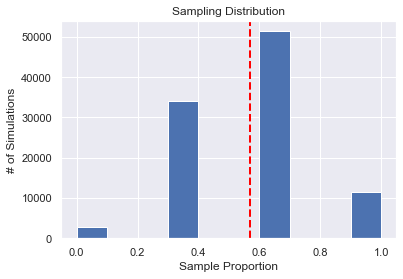

In [9]:
plt.hist(simulations)
plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

The simulations closely match the theory we developed.
This simulation study do not prove the expected value is 4/7 or that the expected proortion of samples with 2 dogs is 18/35, but it confirms our understanding and in more complex situations a simulation study can offer valuable insight. 

### Common probability distributions

This version of the urn model, where we count the number of marbles of a certain type, (in our case 'dog' marbles), is so common that there is a random chance process named for it, the hypergeometric. 
Instead of using `random.choice`, we can use `random.hypergeometric`, which is optimzed for the 0-1 urn and allows us to ask for 100,000 simulations in the call. 
For completeness, we repeat our simulation study, calculate the average and standard error, and display the empirical proportions and histogram. 

Note: we don't think that cats are bad; that's just a convention to call the type you want to count 'good' and the other 'bad'.  

In [10]:
simulations_fast = np.random.hypergeometric(ngood=4, nbad=3, nsample=3, size=100000)

In [11]:
np.mean(simulations_fast / 3)

0.5702600000000001

In [12]:
np.std(simulations_fast / 3)

0.23255388661077625

In [13]:
unique_els, counts_els = np.unique(np.array( simulations_fast ), return_counts=True)

In [14]:
np.array((unique_els, counts_els/100000))

array([[0.     , 1.     , 2.     , 3.     ],
       [0.02849, 0.34433, 0.51509, 0.11209]])

Text(0.5, 0, 'Sample Proportion')

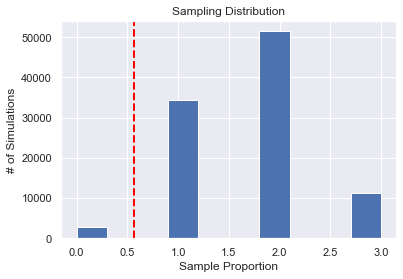

In [15]:
plt.hist(simulations_fast)
plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

Perhaps the two most common probability distributions are those that arise from counting the number of 1s drawn from a 0-1 urn, drawing without replacement is the hypergeometric and drawing with replacement is the binomial. 
We do not delve further in this book into the study of named probability distirbutions, and instead take the approach of using simulation to understand the results of a chance process. However, if possible, it's a good idea to use the functionality provided for simulating from a named distribution, rather than simulating entirely from scratch.  